<a href="https://colab.research.google.com/github/PavelStelmakhV/hw311-keras-conv-fasion-mnist/blob/main/hw311_keras_conv_fasion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
# import numpy as np
import matplotlib.pyplot as plt
# import tf_keras

from keras import layers
from keras import models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# from keras import regularizers
# from keras import callbacks
# from keras import initializers
# from keras.layers import BatchNormalization
# from keras.models import load_model

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# create validation data
# val_size = 6600

# x_val = x_train[-val_size:, :, :]
# x_train = x_train[:-val_size, :, :]

# y_val = y_train[-val_size:]
# y_train = y_train[:-val_size]

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# x_val = x_val.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_val = to_categorical(y_val)

In [ ]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# train_images = train_images.reshape((60000, 28, 28, 1))
# train_images = train_images.astype("float32") / 255
# test_images = test_images.reshape((10000, 28, 28, 1))
# test_images = test_images.astype("float32") / 255
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),

    layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"]
              )
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    verbose=1,
                    validation_split=0.2
                    )

Epoch 1/5
375/375 [==============================] - 47s 124ms/step - loss: 0.3466 - accuracy: 0.8735 - val_loss: 0.3529 - val_accuracy: 0.8675
Epoch 2/5
375/375 [==============================] - 48s 127ms/step - loss: 0.3014 - accuracy: 0.8886 - val_loss: 0.3093 - val_accuracy: 0.8863
Epoch 3/5
375/375 [==============================] - 49s 131ms/step - loss: 0.2727 - accuracy: 0.8999 - val_loss: 0.3017 - val_accuracy: 0.8951
Epoch 4/5
375/375 [==============================] - 46s 122ms/step - loss: 0.2502 - accuracy: 0.9081 - val_loss: 0.2742 - val_accuracy: 0.9002
Epoch 5/5
375/375 [==============================] - 49s 130ms/step - loss: 0.2304 - accuracy: 0.9154 - val_loss: 0.2962 - val_accuracy: 0.8929


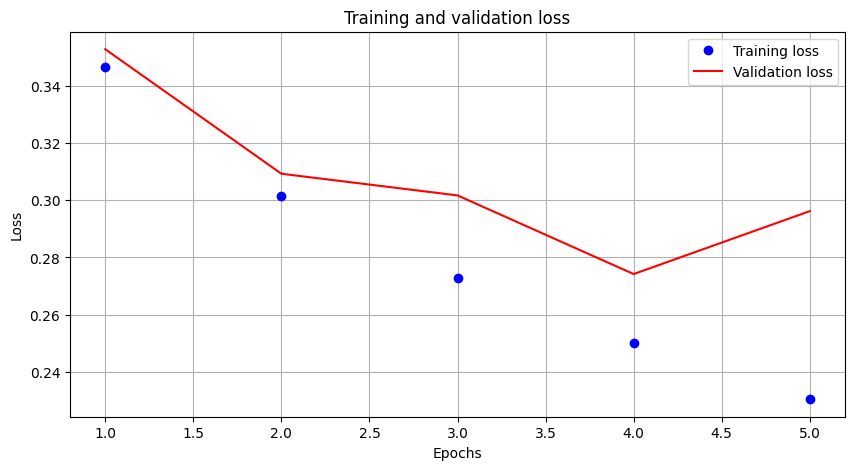

KeyError: 'categorical_accuracy'

<Figure size 640x480 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
# plt.ylim (0.2, 0.5)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
1
plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['categorical_accuracy']
plt.plot(epochs, history_dict['categorical_accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_categorical_accuracy'], 'r', label='Validation acc')
plt.ylim (0.86, 0.94)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              